# Naive Bayes Example

## Gaussian NB

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample

In [121]:
plt.rcParams['figure.figsize'] = [4, 3]

In [107]:
X, y = make_classification(
    n_features=3,
    n_informative=2,
    n_redundant=1,
    n_repeated=0,
    n_classes=2,
    n_samples=800,
    random_state=2,
)

df = pd.DataFrame(X)
df['class'] = y

In [108]:
df.head()

,0,1,2,class
0,1.069760,0.332921,0.319510,1
1,0.564617,0.295841,0.373222,0
2,0.519786,-1.243163,-2.237460,0
3,1.330513,0.855989,1.150016,1
4,-0.290867,0.460087,0.850857,1


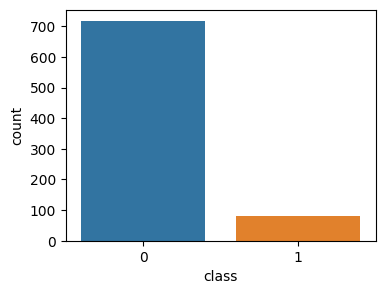

In [125]:
sns.countplot(df, x='class');

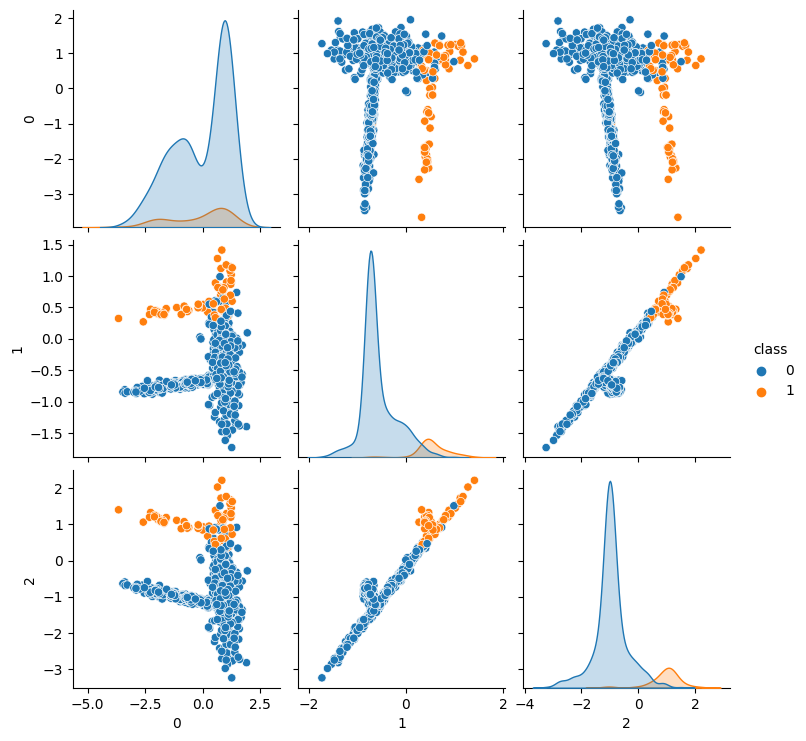

In [126]:
sns.pairplot(df, hue='class');

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

model = GaussianNB()
model.fit(X_train, y_train);

In [112]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9583333333333334


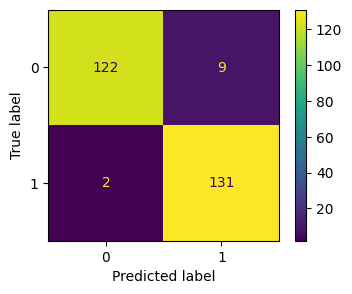

In [124]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

## Imbalanced Dataset

In [114]:
X, y = make_classification(
    n_features=3,
    n_informative=2,
    n_redundant=1,
    n_repeated=0,
    n_classes=2,
    n_samples=800,
    random_state=2,
    weights=[0.9, 0.1]
)

df = pd.DataFrame(X)
df['class'] = y

In [115]:
df.head()

,0,1,2,class
0,0.619987,-0.689991,-1.318543,0
1,0.564617,0.295841,0.373222,0
2,0.519786,-1.243163,-2.237460,0
3,1.140147,-0.967971,-1.912303,0
4,-0.381099,-0.676282,-1.063601,0


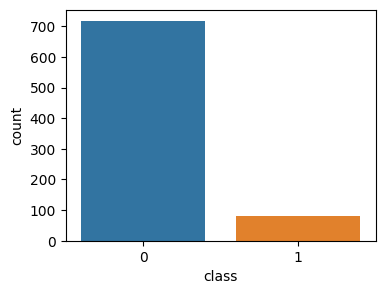

In [123]:
sns.countplot(df, x='class');

### Problem

In [140]:
def evaluate(df):
    X = df.drop('class', axis=1)
    y = df['class']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=125
    )

    model = GaussianNB()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    print("Accuracy:", accuracy)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot();

Accuracy: 0.94375


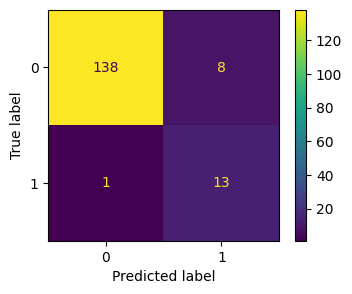

In [141]:
evaluate(df)

### Solution

- Undersampling $\rightarrow$ removing samples from the majority class
    - by random removal $\rightarrow$ loss of information
- Oversampling $\rightarrow$ adding samples to the minority class
    - by random duplication $\rightarrow$ overfitting
- More sophisticated methods $\rightarrow$ imblearn

### Random Undersampling

In [127]:
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == 1]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=2)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

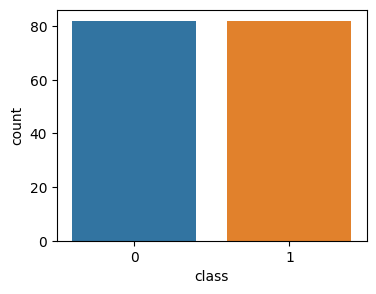

In [129]:
sns.countplot(df_downsampled, x='class');

Accuracy: 0.8787878787878788


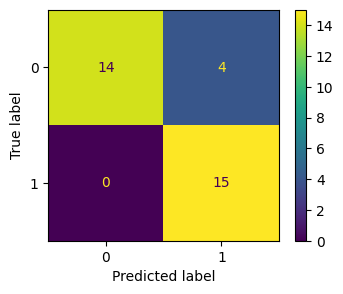

In [142]:
evaluate(df_downsampled)

### Random Oversampling

In [133]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=2)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

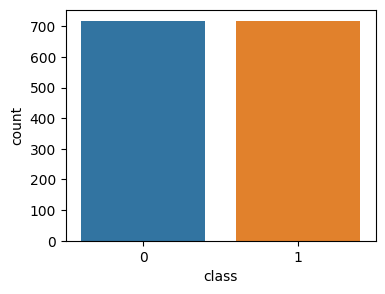

In [145]:
sns.countplot(df_upsampled, x='class');

Accuracy: 0.9444444444444444


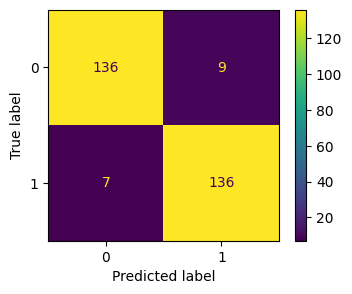

In [143]:
evaluate(df_upsampled)

## Categorical Attribute